# 1. Définition du Machine Learning Classique

Le **machine learning classique** (apprentissage automatique) est une branche de l'intelligence artificielle qui vise à permettre aux ordinateurs d'apprendre à partir de données, sans être explicitement programmés pour chaque tâche. On distingue principalement :

- **L'apprentissage supervisé** : le modèle apprend à partir de données étiquetées (ex : classification, régression).
- **L'apprentissage non supervisé** : le modèle découvre des structures ou des regroupements dans des données non étiquetées (ex : clustering).

Le machine learning classique s'oppose au deep learning, qui utilise des réseaux de neurones profonds pour traiter des données complexes (images, texte, etc.).

# 2. Principaux Types d’Apprentissage

## Apprentissage supervisé
Le modèle apprend à partir d'exemples étiquetés. Exemples :
- **Classification** : Prédire une catégorie (ex : spam ou non spam)
- **Régression** : Prédire une valeur continue (ex : prix d'une maison)

## Apprentissage non supervisé
Le modèle découvre des structures dans des données non étiquetées. Exemples :
- **Clustering** : Regrouper des données similaires (ex : segmentation de clients)
- **Réduction de dimension** : Simplifier les données (ex : PCA)

## Apprentissage par renforcement
Le modèle apprend par essais-erreurs en recevant des récompenses ou pénalités. Exemples :
- Jeux (ex : AlphaGo)
- Robotique

# 3. Formules des Modèles Classiques

## Régression linéaire
$$y = X\beta + \epsilon$$
- $y$ : variable à prédire
- $X$ : variables explicatives
- $\beta$ : coefficients
- $\epsilon$ : bruit

## Régression logistique
$$p = \frac{1}{1 + e^{-z}}$$
- $p$ : probabilité
- $z = X\beta$

## SVM (Support Vector Machine)
$$f(x) = \text{sign}(w^Tx + b)$$
- $w$ : vecteur de poids
- $b$ : biais

## k-NN (k plus proches voisins)
Prédit la classe majoritaire parmi les $k$ voisins les plus proches selon une distance (ex : euclidienne).

### Régression linéaire — illustration

Formule: $$y = X\beta + \epsilon$$

Exemple visuel: nuage de points, droite de régression estimée et histogramme des résidus.

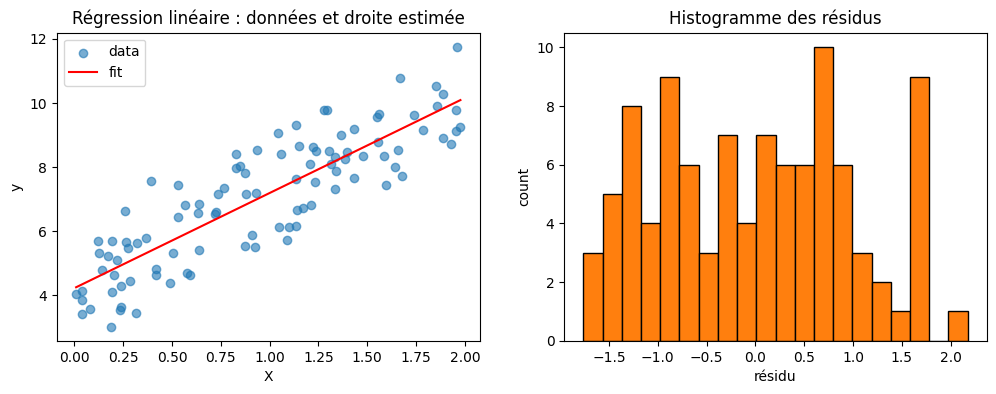

In [10]:
# Linear regression illustrative plot: data, fitted line, residuals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X[:,0] + np.random.randn(100)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(X, y, alpha=0.6, label='data')
axs[0].plot(np.sort(X[:,0]), model.predict(np.sort(X, axis=0)), color='red', label='fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('Régression linéaire : données et droite estimée')

axs[1].hist(residuals, bins=20, color='C1', edgecolor='k')
axs[1].set_title('Histogramme des résidus')
axs[1].set_xlabel('résidu')
axs[1].set_ylabel('count')
plt.show()

### Régression logistique — illustration

Formule (sigmoïde): $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Exemple visuel: sigmoïde et frontière de décision pour un jeu de données 2D.

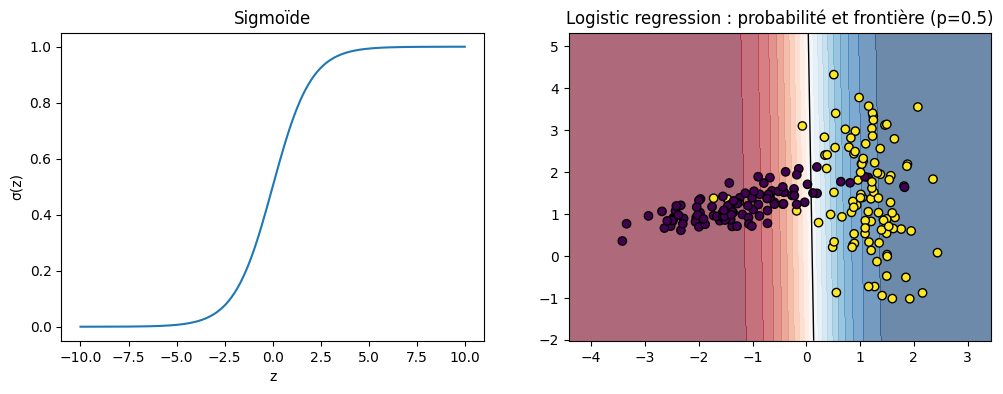

In [11]:
# Logistic regression: sigmoid and decision boundary example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, n_samples=200, flip_y=0.05, class_sep=1.2, random_state=0)
clf = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)

fig, ax = plt.subplots(1,2, figsize=(12,4))
# sigmoid curve
z = np.linspace(-10,10,400)
sig = 1 / (1 + np.exp(-z))
ax[0].plot(z, sig)
ax[0].set_title('Sigmoïde')
ax[0].set_xlabel('z')
ax[0].set_ylabel('\u03C3(z)')

# decision probability contour
cs = ax[1].contourf(xx, yy, probs, levels=20, cmap='RdBu', alpha=0.6)
ax[1].contour(xx, yy, probs, levels=[0.5], colors='k', linewidths=1)
ax[1].scatter(X[:,0], X[:,1], c=y, edgecolor='k')
ax[1].set_title('Logistic regression : probabilité et frontière (p=0.5)')
plt.show()

### SVM — illustration

Formulation (prediction): $$f(x) = \text{sign}(w^Tx + b)$$

Exemple visuel: données 2D, marge, et hyperplan décisionnel.

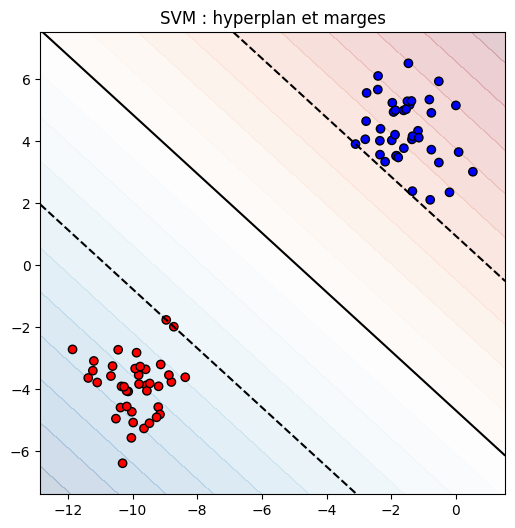

In [12]:
# SVM margin illustration (linear kernel)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=80, centers=2, cluster_std=1.0, random_state=1)
y = 2*y - 1
clf = svm.SVC(kernel='linear', C=1.0).fit(X, y)

xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

plt.figure(figsize=(6,6))
plt.contourf(XX, YY, Z, levels=20, cmap='RdBu', alpha=0.2)
plt.contour(XX, YY, Z, levels=[-1,0,1], linestyles=['--','-','--'], colors='k')
plt.scatter(X[:,0], X[:,1], c=(y>0), cmap='bwr', edgecolor='k')
plt.title('SVM : hyperplan et marges')
plt.show()

### k-NN — illustration

Principe: vote majoritaire parmi les k voisins. Distance usuelle: Euclidienne.

Exemple visuel: frontières de décision pour k=1 et k=5.

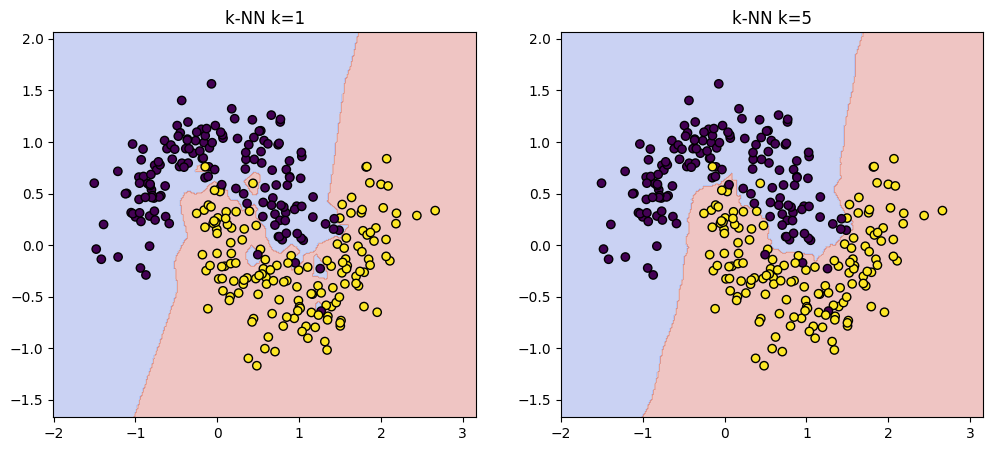

In [13]:
# k-NN decision boundaries (k=1 and k=5)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=300, noise=0.25, random_state=0)
clf1 = KNeighborsClassifier(n_neighbors=1).fit(X,y)
clf5 = KNeighborsClassifier(n_neighbors=5).fit(X,y)

def plot_boundary(clf, X, y, ax):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300), np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')

fig, axs = plt.subplots(1,2, figsize=(12,5))
plot_boundary(clf1, X, y, axs[0])
axs[0].set_title('k-NN k=1')
plot_boundary(clf5, X, y, axs[1])
axs[1].set_title('k-NN k=5')
plt.show()

# 4. Métriques d’Évaluation

## Classification
- **Précision (Accuracy)** :
  $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
- **Rappel (Recall)** :
  $$Recall = \frac{TP}{TP + FN}$$
- **Précision (Precision)** :
  $$Precision = \frac{TP}{TP + FP}$$
- **F1-score** :
  $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

## Régression
- **RMSE (Root Mean Squared Error)** :
  $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2}$$
- **MAE (Mean Absolute Error)** :
  $$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$$

Où :
- $TP$ : vrais positifs
- $TN$ : vrais négatifs
- $FP$ : faux positifs
- $FN$ : faux négatifs
- $y_i$ : valeur réelle
- $\hat{y}_i$ : valeur prédite

# 5. Exemples de Calcul des Métriques

## Exemple de matrice de confusion
|         | Prédit : Oui | Prédit : Non |
|---------|--------------|--------------|
| Réel : Oui  | TP = 50       | FN = 10       |
| Réel : Non  | FP = 5        | TN = 35       |

- **Accuracy** : $\frac{50 + 35}{50 + 35 + 5 + 10} = 0.85$
- **Recall** : $\frac{50}{50 + 10} = 0.83$
- **Precision** : $\frac{50}{50 + 5} = 0.91$
- **F1-score** : $2 \times \frac{0.91 \times 0.83}{0.91 + 0.83} = 0.87$

## Exemple pour la régression
Supposons $y = [3, 5, 2]$ et $\hat{y} = [2.5, 5.3, 1.8]$
- **RMSE** : $\sqrt{\frac{(3-2.5)^2 + (5-5.3)^2 + (2-1.8)^2}{3}} = 0.282$
- **MAE** : $\frac{|3-2.5| + |5-5.3| + |2-1.8|}{3} = 0.333$

Ces exemples montrent comment appliquer les formules pour évaluer les performances d’un modèle.

## Visualisations : matrices et illustrations des algorithmes

Les cellules suivantes génèrent des images illustrant :
- matrice de confusion (exemple),
- descente de gradient (évolution du coût),
- sigmoïde/logistic, SVM (marge), k-NN (frontières), arbre de décision (partition), PCA (projection + variance expliquée), k-means (clusters).

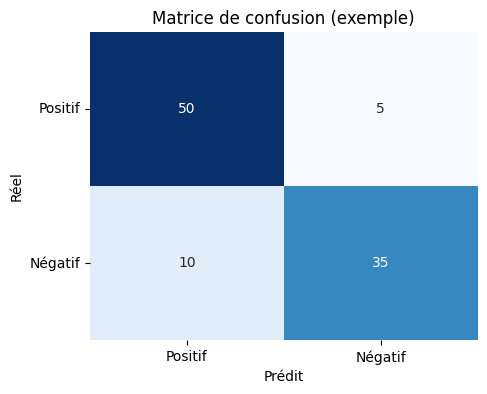

In [1]:
# Confusion matrix example (heatmap)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(5,4))
cm = np.array([[50, 5],[10,35]])  # [[TP, FP],[FN, TN]] in this layout for plotting convenience
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xlabel('Prédit')
ax.set_ylabel('Réel')
ax.set_xticklabels(['Positif','Négatif'])
ax.set_yticklabels(['Positif','Négatif'], rotation=0)
plt.title('Matrice de confusion (exemple)')
plt.show()

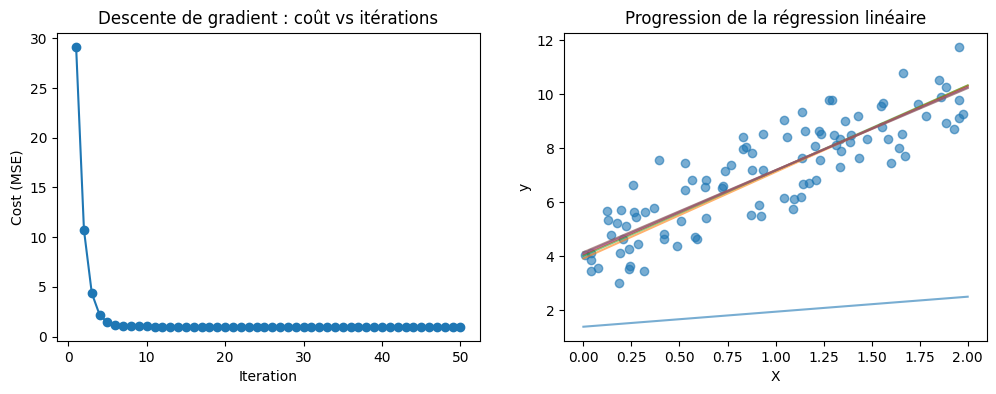

In [2]:
# Gradient descent visualization for a simple linear regression cost
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X[:,0] + np.random.randn(100)

X_b = np.c_[np.ones((100,1)), X]
theta = np.random.randn(2)
alpha = 0.1
n_iter = 50
m = len(y)
costs = []
thetas = []
for it in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
    cost = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    costs.append(cost)
    thetas.append(theta.copy())

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(range(1, n_iter+1), costs, '-o')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Cost (MSE)')
ax[0].set_title('Descente de gradient : coût vs itérations')

# Show fit progression on the data (a few intermediate lines)
ax[1].scatter(X, y, alpha=0.6)
for i in np.linspace(0, n_iter-1, 6, dtype=int):
    t = thetas[i]
    x_line = np.array([[0],[2]])
    ax[1].plot(x_line, t[0] + t[1]*x_line, alpha=0.6)
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].set_title('Progression de la régression linéaire')
plt.show()

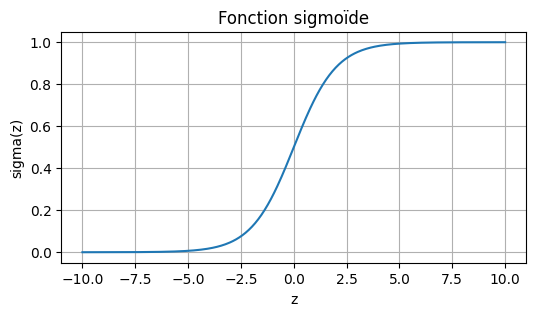

In [3]:
# Sigmoid (logistic) function plot
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 400)
plt.figure(figsize=(6,3))
plt.plot(z, sigmoid(z))
plt.title('Fonction sigmoïde')
plt.xlabel('z')
plt.ylabel('sigma(z)')
plt.grid(True)
plt.show()

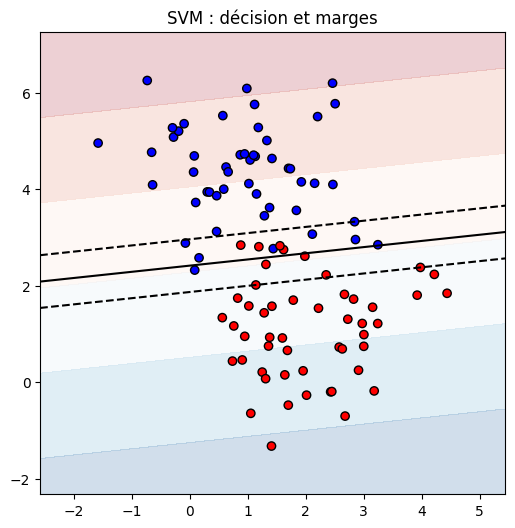

In [4]:
# SVM margin visualization (2D toy data)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=0)
y = 2*y - 1  # labels -1, +1 for SVM visualization
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]

xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

plt.figure(figsize=(6,6))
plt.contourf(XX, YY, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap='RdBu', alpha=0.2)
plt.contour(XX, YY, Z, levels=[-1,0,1], linestyles=['--','-','--'], colors='k')
plt.scatter(X[:,0], X[:,1], c=(y>0), cmap='bwr', edgecolor='k')
plt.title('SVM : décision et marges')
plt.show()

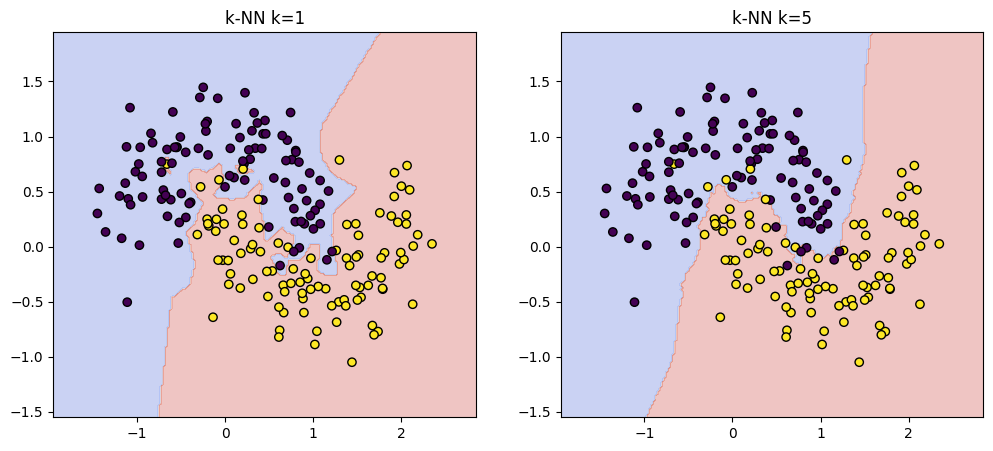

In [5]:
# k-NN decision boundary example (2 classes)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=200, noise=0.25, random_state=0)
clf1 = KNeighborsClassifier(n_neighbors=1).fit(X,y)
clf5 = KNeighborsClassifier(n_neighbors=5).fit(X,y)

def plot_boundary(clf, title, ax):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                         np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(title)

fig, axs = plt.subplots(1,2, figsize=(12,5))
plot_boundary(clf1, 'k-NN k=1', axs[0])
plot_boundary(clf5, 'k-NN k=5', axs[1])
plt.show()

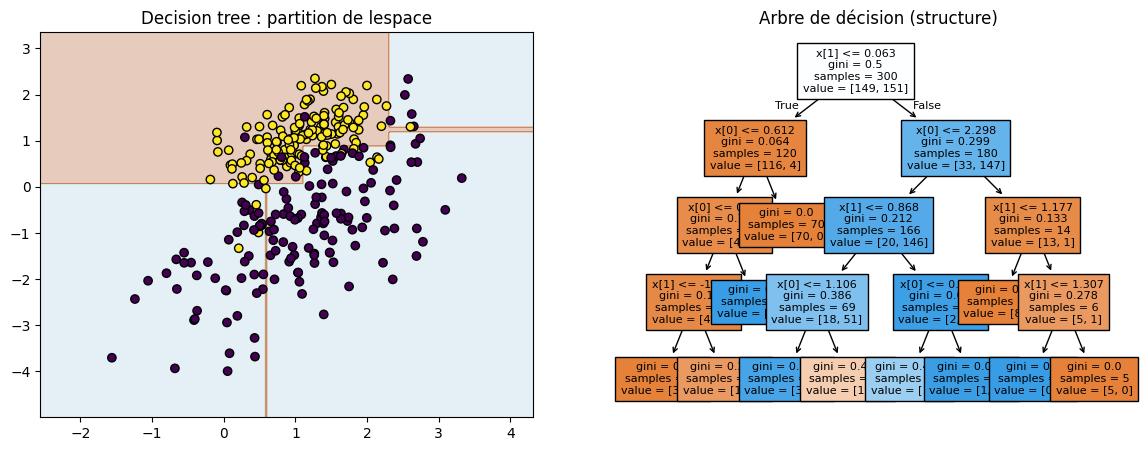

In [6]:
# Decision tree partition visualization (2D toy problem)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, n_samples=300, random_state=0)
clf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X,y)

fig, ax = plt.subplots(1,2, figsize=(14,5))
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300), np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
ax[0].scatter(X[:,0], X[:,1], c=y, edgecolor='k')
ax[0].set_title('Decision tree : partition de lespace')
plot_tree(clf, ax=ax[1], filled=True, fontsize=8)
ax[1].set_title('Arbre de décision (structure)')
plt.show()

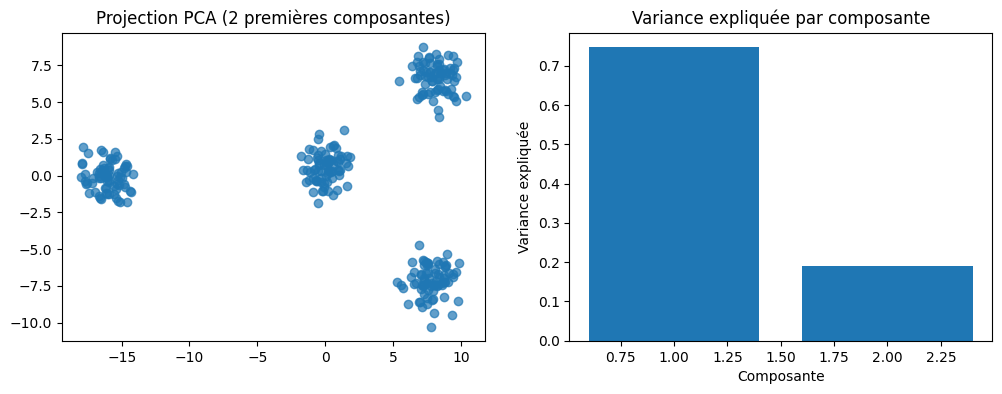

In [7]:
# PCA projection and explained variance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, n_features=6, random_state=0)
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(X2[:,0], X2[:,1], c='C0', alpha=0.7)
ax[0].set_title('Projection PCA (2 premières composantes)')
ax[1].bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
ax[1].set_xlabel('Composante')
ax[1].set_ylabel('Variance expliquée')
ax[1].set_title('Variance expliquée par composante')
plt.show()

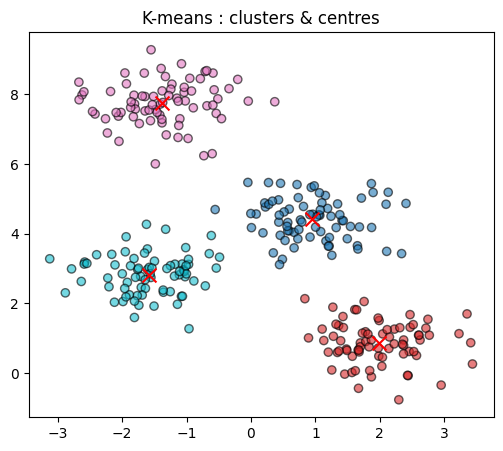

In [9]:
# K-means clustering visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
km = KMeans(n_clusters=4, random_state=0).fit(X)
labels = km.labels_
centers = km.cluster_centers_

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', alpha=0.6, edgecolor='k')
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, marker='x')
plt.title('K-means : clusters & centres')
plt.show()